<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/11_2_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

불균형한 데이터를 다룰때에는 데이터를 균형을 맞춰주는 것이 좋음

https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset/notebooks

In [ ]:
import pandas as pd

raw_df = pd.read_csv('/content/drive/My Drive/ML_DL_202002/Dataset_spine.csv')

In [ ]:
raw_df.drop(columns='Unnamed: 13',inplace=True)
col_name = ['pelvic_incidnece','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
           'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']
raw_df.columns = col_name

raw_df.head(10)

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


In [ ]:
df= raw_df.copy()

In [ ]:
df.Class_att.value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

In [ ]:
df['Class'] = df.Class_att.apply(lambda x: 1 if x=='Abnormal' else 0)

In [ ]:
df.head()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,1


In [ ]:
df.drop(columns=['Class_att'], inplace=True)

In [ ]:
df.head()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [ ]:
df['Class'].value_counts()

1    210
0    100
Name: Class, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['Class'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

sklearn의 resample을 사용하면 데이터를 랜덤으로 생성 가능함

In [ ]:
# resample 사용법 설명
from sklearn.utils import resample
import numpy as np

X= np.array([[1,1],[2,2],[1,1],[3,3],[4,4]])
y= np.array([0,0,1,1,1])
X_up, y_up=resample(X[y==0], y[y==0], replace=True, n_samples =3)
print(X_up)
print(y_up)

[[1 1]
 [1 1]
 [2 2]]
[0 0 0]


In [ ]:
print(len(X_train))
print(len(X_train[y_train==1]))
print(len(X_train[y_train==0]))

217
147
70


In [ ]:
from sklearn.utils import resample

n_samples = len(X_train[y_train==1]) - len(X_train[y_train==0])

X_up, y_up = resample(X_train[y_train==0], y_train[y_train==0], replace=True, 
                      n_samples = n_samples)

In [ ]:
len(X_up)

77

In [ ]:
X_up

array([[ 3.93587053e+01,  7.01126181e+00,  3.70000000e+01,
         3.23474435e+01,  1.17818760e+02,  1.90404820e+00,
         5.87753840e-01,  2.91291000e+01,  9.81680000e+00,
         1.59340200e+01, -8.87179300e+00,  1.25514000e+01],
       [ 3.90872645e+01,  5.53660248e+00,  2.69320383e+01,
         3.35506620e+01,  1.31584420e+02, -7.59461350e-01,
         2.52511739e-01,  2.62684000e+01,  1.26508000e+01,
         1.23605600e+01, -3.40716110e+01,  4.37183000e+01],
       [ 3.90872645e+01,  5.53660248e+00,  2.69320383e+01,
         3.35506620e+01,  1.31584420e+02, -7.59461350e-01,
         2.52511739e-01,  2.62684000e+01,  1.26508000e+01,
         1.23605600e+01, -3.40716110e+01,  4.37183000e+01],
       [ 5.49509702e+01,  5.86535342e+00,  5.30000000e+01,
         4.90856168e+01,  1.26970328e+02, -6.31602951e-01,
         7.77717236e-01,  1.67774000e+01,  1.05263000e+01,
         1.64625000e+01, -3.19370380e+01,  2.21518000e+01],
       [ 3.43822994e+01,  2.06268288e+00,  3.2390820

In [ ]:
y_up

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import numpy as np
X_bal = np.vstack((X_train, X_up))
y_bal = np.hstack((y_train, y_up))

In [ ]:
y_bal.shape

(294,)

In [ ]:
forest = RandomForestClassifier()

In [ ]:
forest.fit(X_bal,y_bal)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

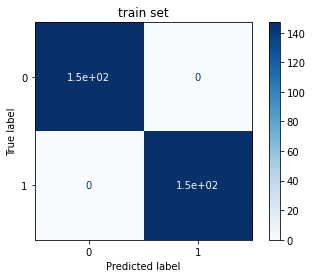

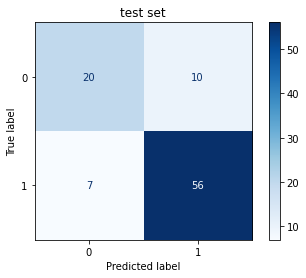

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest, X_bal, y_bal,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('train set')
plt.show()

plot_confusion_matrix(forest, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('test set')
plt.show()

In [ ]:
estimator = forest.estimators_[0]

In [ ]:
from sklearn import tree
dot_data = tree.export_graphviz(estimator, feature_names=df.columns[:-1], filled=True,class_names=['Normal', 'Abnormal'] )

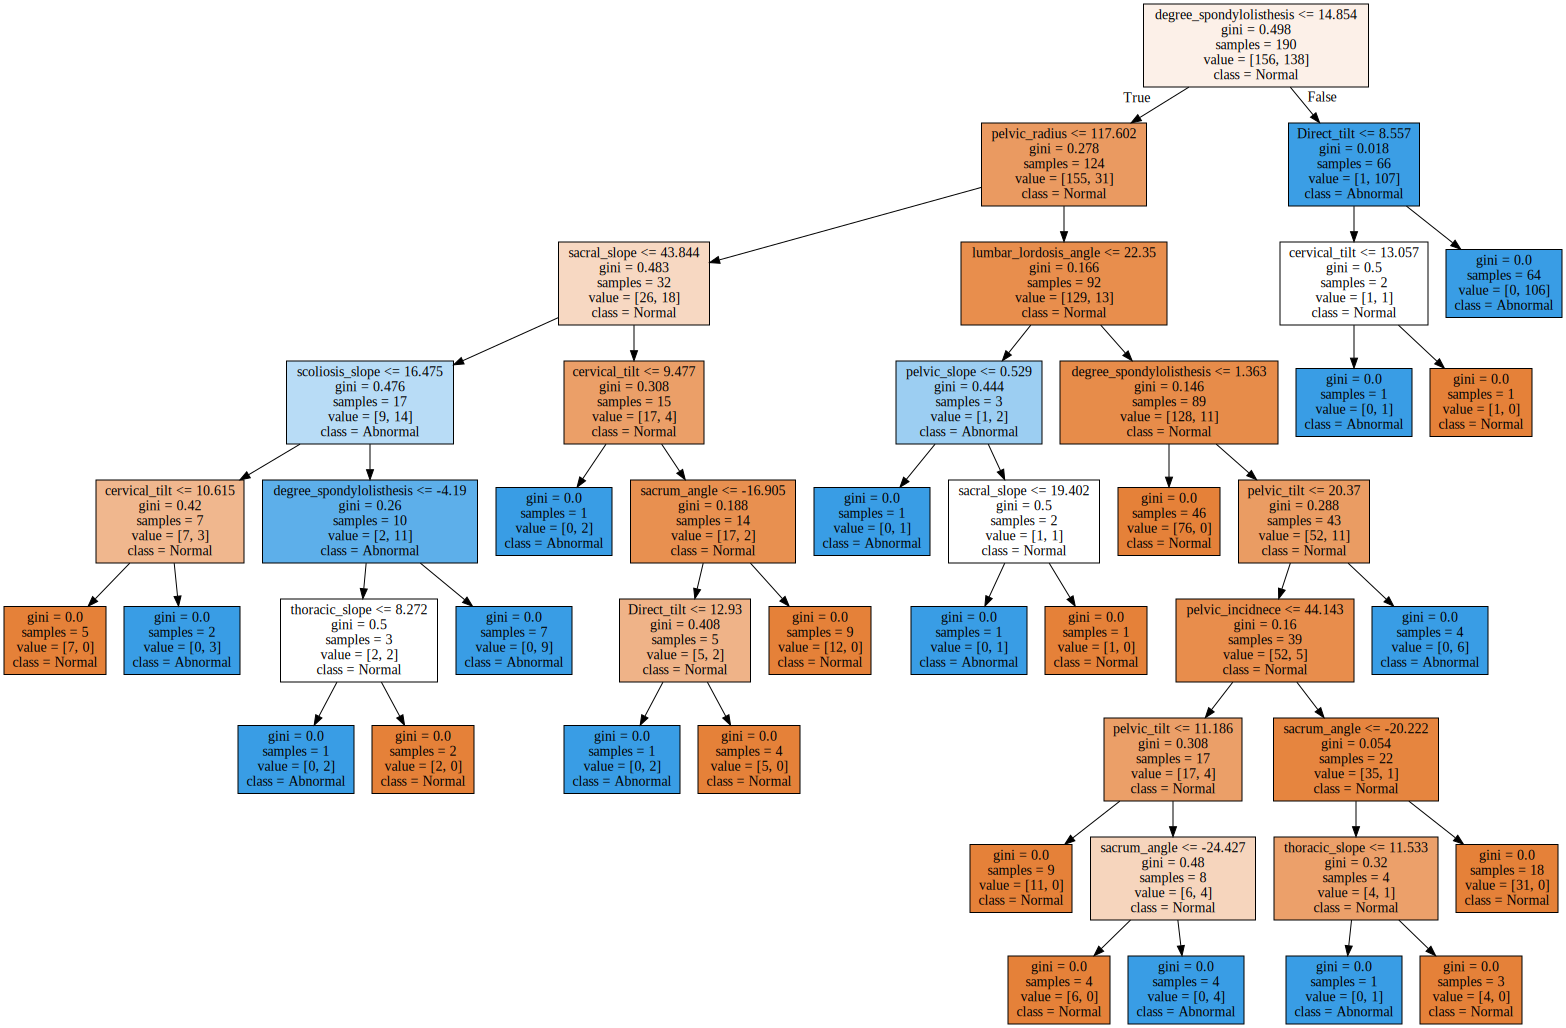

In [ ]:
import graphviz
graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn.metrics import accuracy_score
acc = []

# max depth를 바꾸면서 테스트해보자
for i in range(1, 15):
  forest = RandomForestClassifier(max_depth=i, random_state=0)
  forest.fit(X_bal,y_bal)

  # train acc
  y_train_pred = forest.predict(X_bal)
  train_acc = accuracy_score(y_bal, y_train_pred)

  # test acc
  y_test_pred = forest.predict(X_test)
  test_acc=accuracy_score(y_test, y_test_pred)
  acc.append({'max_depth':i, 'train_acc':train_acc, 'test_acc':test_acc})

  print('max_depth: {}, train acc: {}, test acc: {}'.format(i, train_acc, test_acc))

max_depth: 1, train acc: 0.8299319727891157, test acc: 0.7419354838709677
max_depth: 2, train acc: 0.8469387755102041, test acc: 0.7634408602150538
max_depth: 3, train acc: 0.9013605442176871, test acc: 0.7526881720430108
max_depth: 4, train acc: 0.935374149659864, test acc: 0.7956989247311828
max_depth: 5, train acc: 0.9591836734693877, test acc: 0.8279569892473119
max_depth: 6, train acc: 0.9829931972789115, test acc: 0.8172043010752689
max_depth: 7, train acc: 0.9931972789115646, test acc: 0.8064516129032258
max_depth: 8, train acc: 1.0, test acc: 0.7956989247311828
max_depth: 9, train acc: 1.0, test acc: 0.7849462365591398
max_depth: 10, train acc: 1.0, test acc: 0.7849462365591398
max_depth: 11, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 12, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 13, train acc: 1.0, test acc: 0.7956989247311828
max_depth: 14, train acc: 1.0, test acc: 0.7956989247311828


In [ ]:
acc_df = pd.DataFrame(acc)

In [ ]:
acc_df.set_index('max_depth', inplace=True)

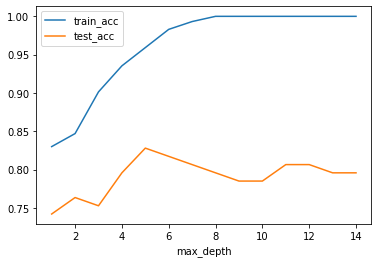

In [ ]:
acc_df.plot()

In [ ]:
# upsampling 하지 않은 경우

from sklearn.metrics import accuracy_score
acc = []

# max depth를 바꾸면서 테스트해보자
for i in range(1, 15):
  forest = RandomForestClassifier(max_depth=i, random_state=0)
  forest.fit(X_train,y_train)

  # train acc
  y_train_pred = forest.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_pred)

  # test acc
  y_test_pred = forest.predict(X_test)
  test_acc=accuracy_score(y_test, y_test_pred)
  acc.append({'max_depth':i, 'train_acc':train_acc, 'test_acc':test_acc})

  print('max_depth: {}, train acc: {}, test acc: {}'.format(i, train_acc, test_acc))

max_depth: 1, train acc: 0.7880184331797235, test acc: 0.6881720430107527
max_depth: 2, train acc: 0.880184331797235, test acc: 0.7526881720430108
max_depth: 3, train acc: 0.9216589861751152, test acc: 0.8172043010752689
max_depth: 4, train acc: 0.9769585253456221, test acc: 0.7956989247311828
max_depth: 5, train acc: 0.9953917050691244, test acc: 0.7956989247311828
max_depth: 6, train acc: 1.0, test acc: 0.7956989247311828
max_depth: 7, train acc: 1.0, test acc: 0.8172043010752689
max_depth: 8, train acc: 1.0, test acc: 0.7956989247311828
max_depth: 9, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 10, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 11, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 12, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 13, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 14, train acc: 1.0, test acc: 0.8064516129032258


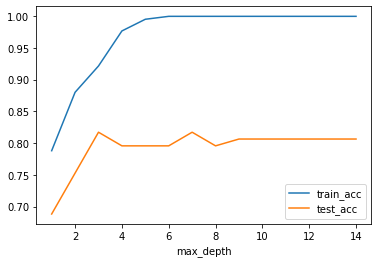

In [ ]:
acc_df = pd.DataFrame(acc)
acc_df.set_index('max_depth', inplace=True)
acc_df.plot()